# RIDGELINE CHART 📊
## TEMPERATURE AND CUM. PRECIPITATION DISTRIBUTIONS FOR DIFFERENT CITIES IN SPAIN IN 2024

*Data source:*
https://open-meteo.com/

In [1]:
# Load necessary libraries
library(readr)
library(dplyr)
library(ggplot2)
library(ggridges)

# Create a list of dataframes for each city
data <- list(
    list(
        label="A Coruña",
        df=read_csv("data/daily_A_Coruna.csv")
        ),
    list(
        label="Barcelona",
        df=read_csv("data/daily_Barcelona.csv")
        ),
    list(
        label="Bilbao",
        df=read_csv("data/daily_Bilbao.csv")
        ),
    list(
        label="Las Palmas de GC",
        df=read_csv("data/daily_Las_Palmas_GC.csv")
        ),
    list(
        label="Madrid",
        df=read_csv("data/daily_Madrid.csv")
        ),
    list(
        label="Palma de Mallorca",
        df=read_csv("data/daily_Palma.csv")
        ),
    list(
        label="Sevilla",
        df=read_csv("data/daily_Sevilla.csv")
        ),
    list(
        label="Valencia",
        df=read_csv("data/daily_Valencia.csv")
        ),
    list(
        label="Zaragoza",
        df=read_csv("data/daily_Zaragoza.csv")
        )
)

# Modify each df by adding a column with the city name and rename the columns
for (i in 1:length(data)) {
    data[[i]]$df <- data[[i]]$df %>% 
        mutate(city = data[[i]]$label) %>% 
        rename(date = time, 
               tmean = `temperature_2m_mean (°C)`, 
               prec = `precipitation_sum (mm)`
               )
    # Replace 0 values in precipitation with NA
    data[[i]]$df$prec[data[[i]]$df$prec == 0] <- NA
}

# Combine all dataframes into one
combined_data <- do.call(rbind, lapply(data, function(x) x$df))


Adjuntando el paquete: 'dplyr'


The following objects are masked from 'package:stats':

    filter, lag


The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union


Rows: 366 Columns: 3
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
dbl  (2): temperature_2m_mean (°C), precipitation_sum (mm)
date (1): time

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 366 Columns: 3
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
dbl  (2): temperature_2m_mean (°C), precipitation_sum (mm)
date (1): time

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 366 Columns: 3
── Column specification ────────────────────────────────────────────────────────
D

Picking joint bandwidth of 1.49

Saving 7 x 7 in image
Picking joint bandwidth of 1.49

Picking joint bandwidth of 1.34



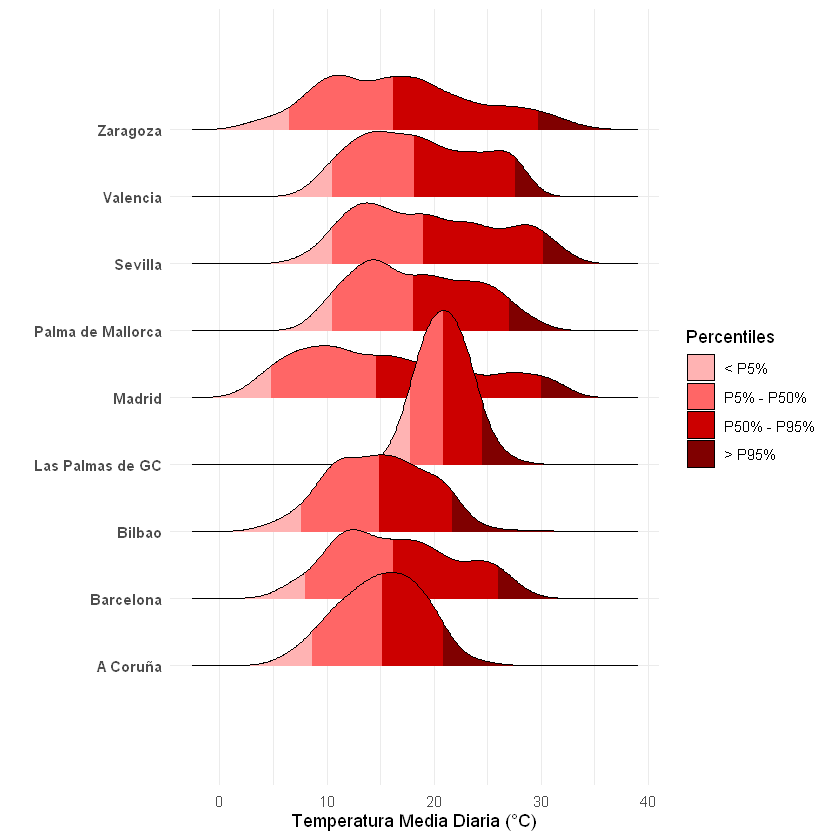

Saving 7 x 7 in image
Picking joint bandwidth of 1.34



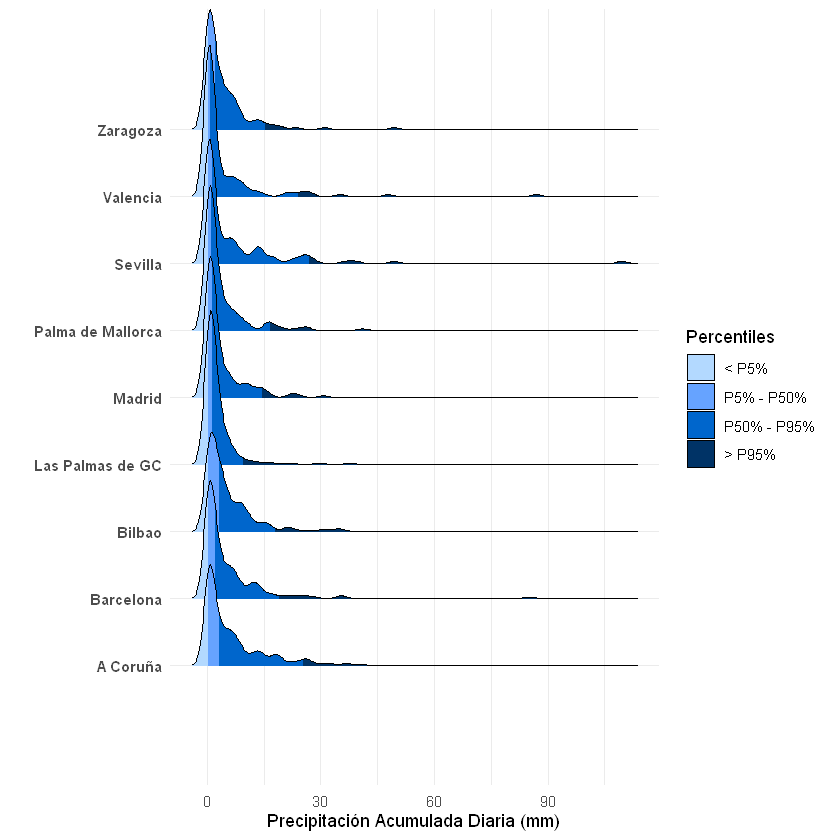

In [2]:
# Plot de temperatura
ggplot(combined_data, aes(x = tmean, y = city, fill = after_stat(quantile))) +
    geom_density_ridges_gradient(
        scale = 2.3, 
        alpha = 0.6, 
        quantiles = c(0.05, 0.5, 0.95),
        calc_ecdf = TRUE
    ) +
    scale_fill_manual(
        name = "Percentiles",
        values = c("#FFB3B3", "#FF6666", "#CC0000", "#800000"),
        labels = c("< P5%", "P5% - P50%", "P50% - P95%", "> P95%")
    ) +
    xlab("Temperatura Media Diaria (°C)") +
    ylab("") +
    theme_minimal() +
    scale_y_discrete(expand = c(0.2, 0.2)) +
    theme(axis.text.y = element_text(face = "bold"))
# Save the plot as a PNG file
ggsave("plots/temperature_plot.png", dpi = 300)

# Plot de precipitación
ggplot(combined_data, aes(x = prec, y = city, fill = after_stat(quantile))) +
    geom_density_ridges_gradient(
        scale = 2.3, 
        alpha = 0.6, 
        quantiles = c(0.05, 0.5, 0.95),
        calc_ecdf = TRUE
    ) +
    scale_fill_manual(
        name = "Percentiles",
        values = c("#B3D9FF", "#66A3FF", "#0066CC", "#003366"),
        labels = c("< P5%", "P5% - P50%", "P50% - P95%", "> P95%")
    ) +
    xlab("Precipitación Acumulada Diaria (mm)") +
    ylab("") +
    theme_minimal() +
    scale_y_discrete(expand = c(0.2, 0.2)) +
    theme(axis.text.y = element_text(face = "bold"))
# Save the plot as a PNG file
ggsave("plots/precipitation_plot.png", dpi = 300)